<a href="https://colab.research.google.com/github/Yyssjj96/__practice___/blob/main/%ED%91%9C%EB%B3%B8%EC%B6%94%EC%B6%9C%2C%EC%A4%91%EC%8B%AC%EA%B7%B9%ED%95%9C%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 무작위 샘플링 (Random Sampling)
무작위 샘플링은 모집단에서 각각의 데이터가 동일한 확률로 선택되도록 하는 샘플링 방법입니다. 즉, 모집단의 모든 개체가 샘플로 선택될 확률이 동일합니다. 이 방법의 장점은 간단하고 구현이 용이하다는 점입니다.

- 장점: 편향이 적고 데이터의 대표성이 높을 가능성이 큽니다.
- 단점: 표본이 모집단의 전체 특성을 대표하지 않을 수 있습니다. 특히 모집단이 크거나 특성이 다양할 경우에는 비효율적일 수 있습니다.
2. 층화 샘플링 (Stratified Sampling)
층화 샘플링은 모집단을 특정 특성에 따라 서로 다른 계층(층)으로 나누고, 각 계층에서 샘플을 추출하는 방법입니다. 각 계층은 서로 다르지만, 계층 내에서는 유사한 특성을 가진 데이터가 모여 있습니다.

- 장점: 각 계층의 특성이 잘 반영되므로, 전체 모집단의 특성을 더 잘 추정할 수 있습니다. 특히 계층 간 차이가 클 때 유용합니다.
- 단점: 계층화 과정이 복잡할 수 있으며, 각 계층의 크기를 정확히 알아야 합니다.
3. 군집 샘플링 (Cluster Sampling)
군집 샘플링은 모집단을 군집(클러스터)으로 나누고, 일부 군집을 무작위로 선택한 후, 선택된 군집에서 전체 샘플을 추출하는 방법입니다. 군집은 일반적으로 자연적인 그룹이나 집단을 기반으로 형성됩니다.

- 장점: 샘플링이 효율적이며, 비용이 낮을 수 있습니다. 군집이 비교적 균질하면 좋은 결과를 제공할 수 있습니다.
- 단점: 군집 내의 다양성이 낮으면 모집단의 대표성이 떨어질 수 있습니다. 군집 내의 개체가 서로 유사하면 비효율적일 수 있습니다.
4. 계층 샘플링 (Hierarchical Sampling)
계층 샘플링은 계층적으로 여러 수준의 샘플링을 진행하는 방법입니다. 예를 들어, 먼저 큰 집단에서 샘플을 추출하고, 그 후 각 추출된 집단 내에서 추가적인 샘플을 추출하는 방법입니다. 일반적으로 다단계 샘플링이라고도 합니다.

- 장점: 복잡한 모집단 구조를 효과적으로 다룰 수 있으며, 샘플링의 효율성을 높일 수 있습니다. 각 단계에서 샘플링 오류를 줄일 수 있습니다.
- 단점: 샘플링 절차가 복잡하며, 각 단계에서의 적절한 샘플링 계획이 필요합니다. 데이터 수집과 분석이 복잡할 수 있습니다.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)

# 데이터 생성
num_samples = 1000
data = {
    'A': np.random.normal(loc=50, scale=10, size=num_samples),  # 평균 50, 표준편차 10
    'B': np.random.uniform(low=0, high=100, size=num_samples),  # 균등분포, 0과 100 사이
    'C': np.random.poisson(lam=5, size=num_samples)  # 포아송 분포
}

df = pd.DataFrame(data)

In [2]:
# 무작위 샘플링: 데이터프레임에서 10%를 무작위로 선택
random_sample_df = df.sample(frac=0.1, random_state=1)  # frac=0.1은 10% 샘플링
print("무작위 샘플링 결과:")
print(random_sample_df.head())

무작위 샘플링 결과:
             A          B  C
507  34.322323  34.060464  9
818  41.474142  70.807493  3
452  54.631303  70.063334  6
368  47.322665  85.268901  7
242  48.671194   5.975792  5


In [3]:
# 층화 샘플링: C 값이 5 이하인 그룹과 초과인 그룹 각각에서 10% 샘플링
grouped = df.groupby(df['C'] > 5)
stratified_sample_df = grouped.apply(lambda x: x.sample(frac=0.1, random_state=1))
stratified_sample_df = stratified_sample_df.reset_index(drop=True)
print("\n층화 샘플링 결과:")
print(stratified_sample_df.head())


층화 샘플링 결과:
           A          B  C
0  43.104502  65.786213  4
1  49.446475  58.466286  3
2  52.869045  55.268647  2
3  62.650778  33.851449  2
4  43.322797  17.610384  5


In [7]:
from sklearn.utils import shuffle

# 'A' 열을 기준으로 군집 샘플링
clusters_A = df.groupby('A').apply(lambda x: x.sample(n=min(5, len(x)), random_state=1)).reset_index(drop=True)
clustered_sample_A = clusters_A.sample(frac=0.1, random_state=1).reset_index(drop=True)
print("\n'A' 열 기준 군집 샘플링 결과:")
print(clustered_sample_A)

# 'B' 열을 기준으로 군집 샘플링
clusters_B = df.groupby('B').apply(lambda x: x.sample(n=min(5, len(x)), random_state=1)).reset_index(drop=True)
clustered_sample_B = clusters_B.sample(frac=0.1, random_state=1).reset_index(drop=True)
print("\n'B' 열 기준 군집 샘플링 결과:")
print(clustered_sample_B)

# 'C' 열을 기준으로 군집 샘플링
clusters_C = df.groupby('C').apply(lambda x: x.sample(n=min(5, len(x)), random_state=1)).reset_index(drop=True)
clustered_sample_C = clusters_C.sample(frac=0.1, random_state=1).reset_index(drop=True)
print("\n'C' 열 기준 군집 샘플링 결과:")
print(clustered_sample_C)


'A' 열 기준 군집 샘플링 결과:
            A          B  C
0   49.554046  52.282428  3
1   58.635197  33.350740  2
2   48.246836  64.513853  5
3   46.145102  53.699889  5
4   42.693222  66.285648  5
..        ...        ... ..
95  53.764255  49.340696  7
96  50.782602  35.307496  4
97  51.839255  76.924712  3
98  43.159891  19.751911  4
99  39.700647   1.573824  6

[100 rows x 3 columns]

'B' 열 기준 군집 샘플링 결과:
            A          B  C
0   48.128161  53.232033  6
1   58.443630  83.047635  7
2   44.145688  47.661423  6
3   62.859840  38.165375  6
4   36.585033  25.803596  4
..        ...        ... ..
95  49.253320  69.632369  4
96  39.514470  57.759009  5
97  51.725044  61.218087  3
98  65.927708  27.624767  1
99  44.672972  15.946909  4

[100 rows x 3 columns]

'C' 열 기준 군집 샘플링 결과:
           A          B   C
0  38.319065  55.099397   4
1  50.037709  81.807723   7
2  53.172182  90.824838  10
3  30.192035  37.406263   5
4  48.423330  18.531292  13
5  40.869208  31.546516   0


In [8]:
# 계층 샘플링: 'C' 값의 계층을 형성하고 각 계층에서 10% 샘플링
hierarchical_sample_df = df.groupby('C').apply(lambda x: x.sample(frac=0.1, random_state=1)).reset_index(drop=True)
print("\n계층 샘플링 결과:")
print(hierarchical_sample_df.head())


계층 샘플링 결과:
           A          B  C
0  52.461478  26.307878  0
1  41.623220  72.407253  1
2  49.986150  72.961138  1
3  73.807454  25.052059  1
4  45.444675  35.945315  2


신뢰구간
1. 중심 극학 정리
2. confidence interval의 의미 확인하기

In [12]:
# 지수 분포
# f(x|lambda) = lambda*exp(-lambda*x)
import matplotlib.pyplot as plt

In [17]:
population_n = int(1e+4)

In [18]:
population_n

10000

In [19]:
ld1,ld2,ld3 = 1,2,3

In [20]:
y1 = np.random.exponential(ld1,population_n)
y2 = np.random.exponential(ld2,population_n)
y3 = np.random.exponential(ld3,population_n)

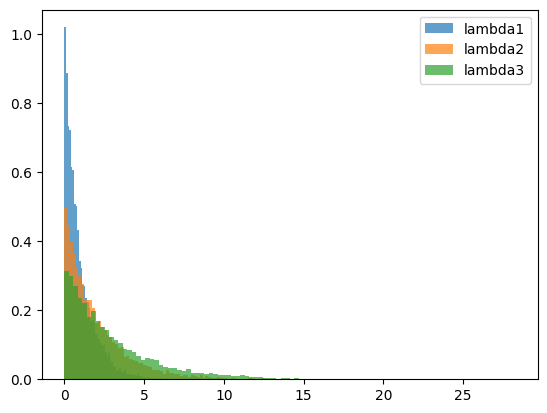

In [25]:
plt.hist(y1,alpha=0.7,label='lambda'+str(ld1),density=True,bins=100)
plt.hist(y2,alpha=0.7,label='lambda'+str(ld2),density=True,bins=100)
plt.hist(y3,alpha=0.7,label='lambda'+str(ld3),density=True,bins=100)
plt.legend()
plt.show()

Doing calculation: 100%|██████████| 10000/10000 [00:00<00:00, 18316.39it/s]


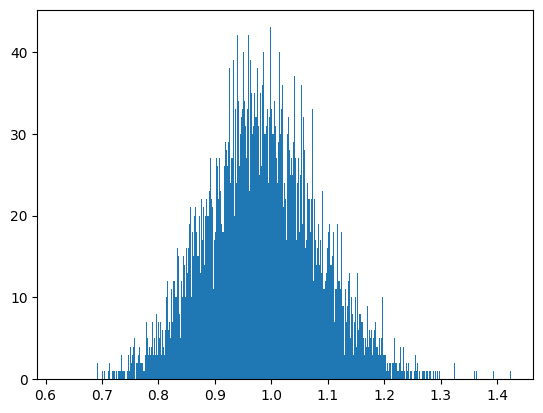

In [28]:
# 평균값 분포가 어떻게 나타나는지 확인
from tqdm import tqdm
def sub_sample_get_average(population,sample_n=100,times=1000):
  averages=[]
  for iteration in tqdm(range(times),desc='Doing calculation') :
    sample_population = np.random.choice(population,sample_n)
    sample_mean = sample_population.mean()
    averages.append(sample_mean)

  plt.hist(averages,bins=1000)

sub_sample_get_average(population=y1,sample_n=100,times=10000)

Doing calculation: 100%|██████████| 100/100 [00:00<00:00, 17553.80it/s]


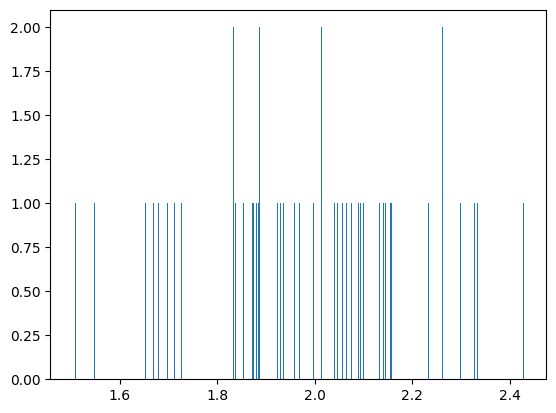

In [30]:
sub_sample_get_average(population=y2,sample_n=100,times=100)

Doing calculation: 100%|██████████| 10000/10000 [00:00<00:00, 28997.43it/s]


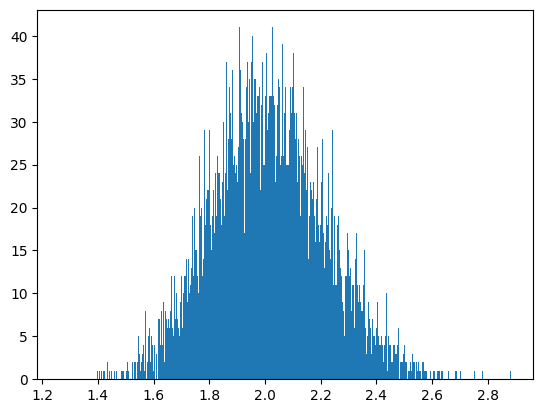

In [32]:
sub_sample_get_average(population=y2,sample_n=100,times=10000)

Doing calculation: 100%|██████████| 10000/10000 [00:00<00:00, 20999.09it/s]


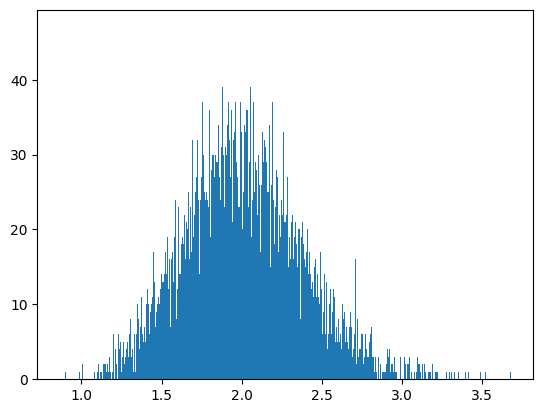

In [36]:
sub_sample_get_average(population=y2,sample_n=30,times=10000)